**Library Imports**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from sklearn.model_selection import train_test_split
print("Version: ", tf.__version__)
print("Version: ", hub.__version__)
print("GPU", "available (Yes)" if tf.config.list_physical_devices else "Not available")

Version:  2.10.0
Version:  0.8.0
GPU available (Yes)


**Data import**

In [2]:

labels_csv = pd.read_csv("labels.csv")

In [3]:
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [4]:
print(labels_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


**Data Visulization**

<Axes: >

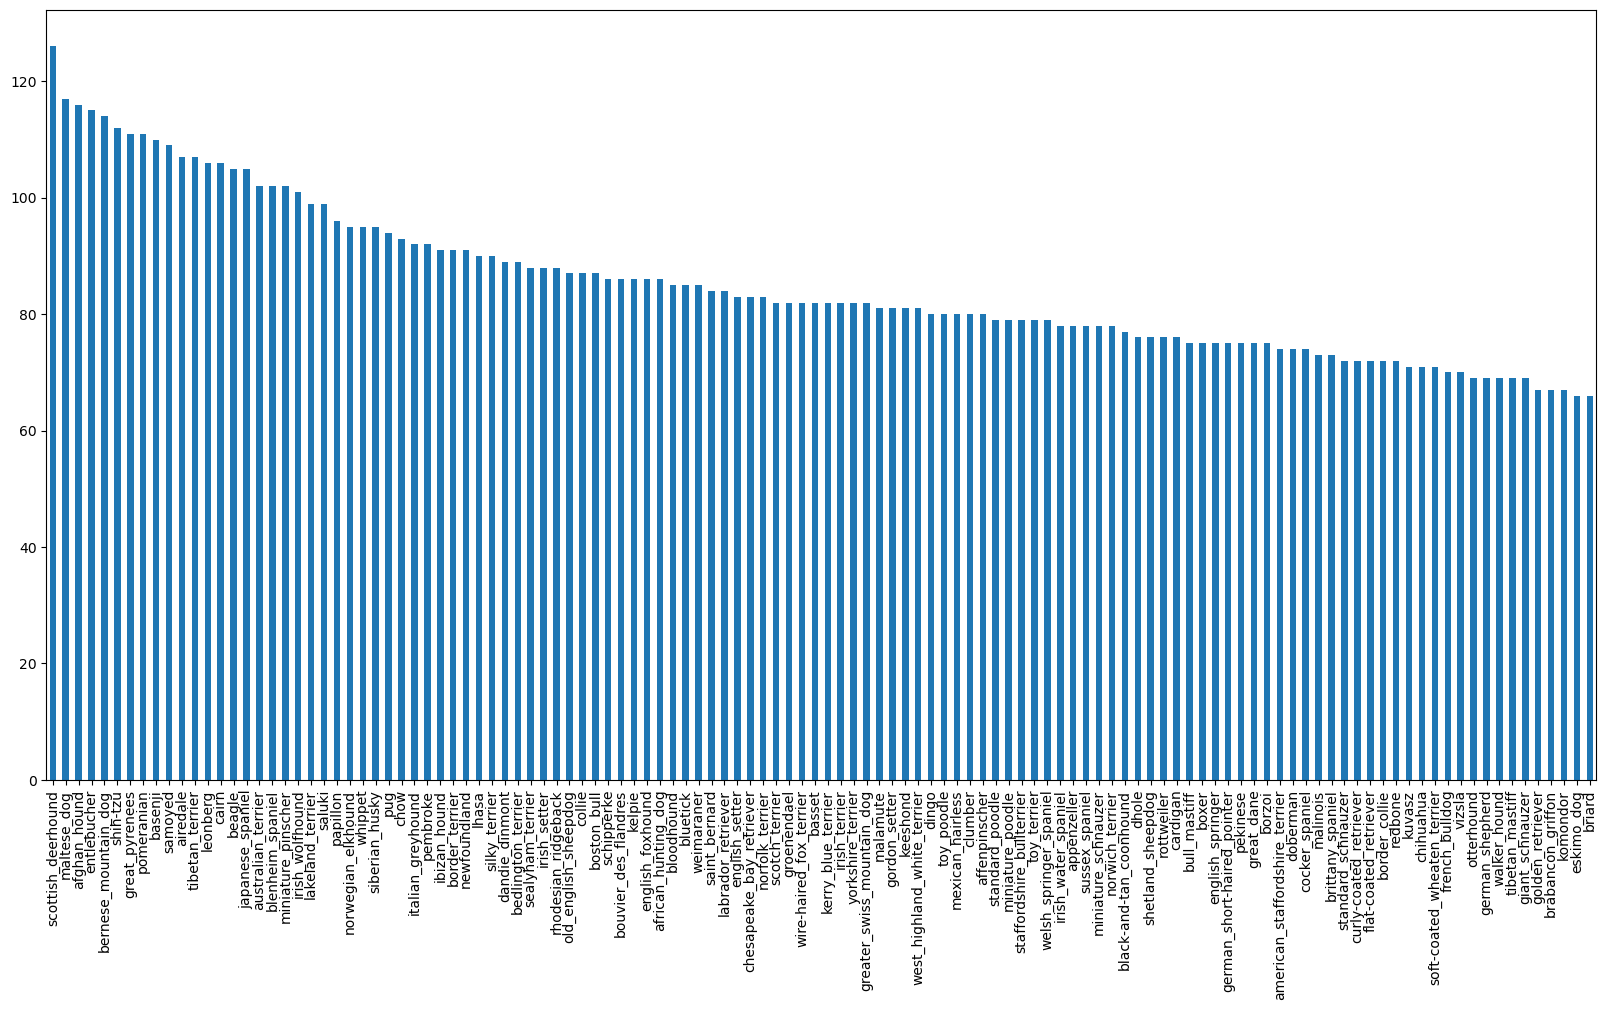

In [5]:
labels_csv.breed.value_counts().plot.bar(figsize=(20, 10))

In [6]:
labels_csv.breed.value_counts().max()

126

**Data Preparation**

In [7]:
filenames = []

for fname in labels_csv["id"]:
    filenames.append(f"F:\Projects\Machine Learning\Dog Breed\train\{fname}.jpg")

filenames

['F:\\Projects\\Machine Learning\\Dog Breed\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\0042188c895a2f14ef64a918ed9c7b64.jpg',
 'F:\\Projects\\Machine Learning\\Dog Breed\train\\004396df1acd0f1247b740ca2b14616e.jpg',
 'F:\\Proj

In [8]:
labels = np.array(labels_csv.breed)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [9]:
if len(labels) == len(filenames):
  print("Yes, it's equal")
else:
  print("Oh no")

Yes, it's equal


In [10]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [11]:
boolean_labels = [label == unique_breeds for label in labels]

boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [12]:
len(boolean_labels)

10222

In [13]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


**Model Preparation**

In [14]:
X = filenames
y = boolean_labels

In [15]:
NUM_IMAGES = 1000

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [17]:
IMAGE_SIZE = 224

def image_to_tensor(imagepath):
  #Read file
  image = tf.io.read_file(imagepath)
  #Convert file in a numerical tensor
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert values between 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])

  return image

In [19]:
def get_image_label(path_image, label):
  image = image_to_tensor(imagepath=path_image)
  return image, label

In [20]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data= False, test_data= False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))

    data_batch = data.map(image_to_tensor).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    #Shuffle
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [21]:
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [22]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")
  ])

  #Compile
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

In [28]:
%load_ext tensorboard

In [29]:
import datetime
import os

def create_tensorboard_callback():
   logdir = os.path.join("drive/MyDrive/Dog Breed/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M&S") )

   return tf.keras.callbacks.TensorBoard(logdir)

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [31]:
NUM_EPOCHES = 100

In [32]:
def train_model():
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(
      x=train_data,
      epochs=NUM_EPOCHES,
      validation_data=val_data,
      validation_freq=1,
      callbacks=[tensorboard, early_stopping]
  )

  return model

In [33]:
def save_model(model, suffix=None):
  modeldir = os.path.join("drive/MyDrive/Dog Breed/models", datetime.datetime.now().strftime("%Y%m%d-%H%M&S"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to {model_path}")
  model.save(model_path)

  return model_path

In [34]:
def load_model(model_path):
  print(f"Loading a model from {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer": hub.KerasLayer})
  return model

In [35]:
dataset = create_data_batches(X, y)

Creating training data batches...


In [36]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [37]:
model_tensorboard = create_tensorboard_callback()
model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [38]:
model = create_model()

**Training Model**

In [ ]:
model.fit(
    x=dataset,
    epochs=NUM_EPOCHS,
    callbacks=[model_tensorboard, model_early_stopping]
)

**Saving Model**

In [ ]:
save_model(model)

**Loading the saved trained model**

In [39]:
loaded_fullmodel = load_model("drive/MyDrive/Dog Breed/models/20230819-1904&S-model-trained-on-the-full-dataset.h5")

Loading a model from drive/MyDrive/Dog Breed/models/20230819-1904&S-model-trained-on-the-full-dataset.h5
